# **TASKS-**

### **Task 1: Exploratory Data Analysis (EDA)**

### **Task 2: Dimensionality Reduction with PCA**

### **Task 3: Clustering with Original Data**

### **Task 4: Clustering with PCA Data**

### **Task 5: Comparison and Analysis**

### **Task 6: Conclusion and Insights**

Goal #1 : learn relationships with PCA by interpreting the weights

Goal #2: Reduce data dimesions

Goal #3: Use PCA for visulaizaion(in 2D data)

## **Task 1: Exploratory Data Analysis (EDA):**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
wine = pd.read_csv('wine.csv')

In [ ]:
data = pd.read_csv('wine.csv')

In [ ]:
data.head(2)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


In [ ]:
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [ ]:
# Exclude the 'Type' column from scaling as it is categorical
wine = wine.iloc[:,1:]
wine.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
wine.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
#Checking for null values
wine.isnull().sum().sum()

0

In [ ]:
#Checking for dulplicate values
wine.duplicated().sum()

0

**Hist plot on dataset**

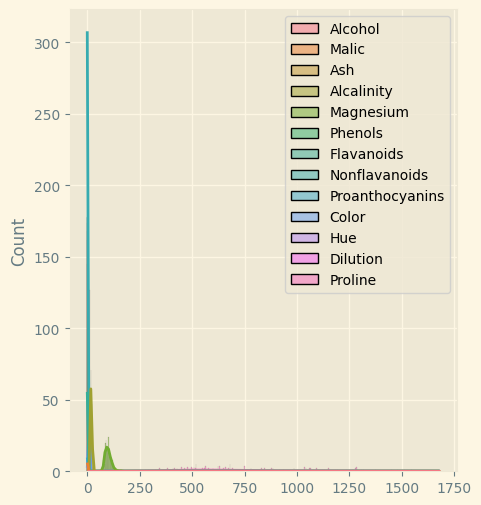

In [ ]:
plt.figure(figsize=(5,6))
sns.histplot(wine,kde=True,bins=500)
plt.show()

**Box plot on the dataset**

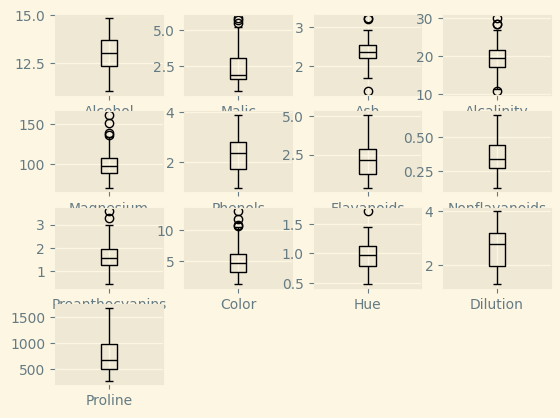

In [ ]:
wine.plot( kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False,color='black')
plt.show()

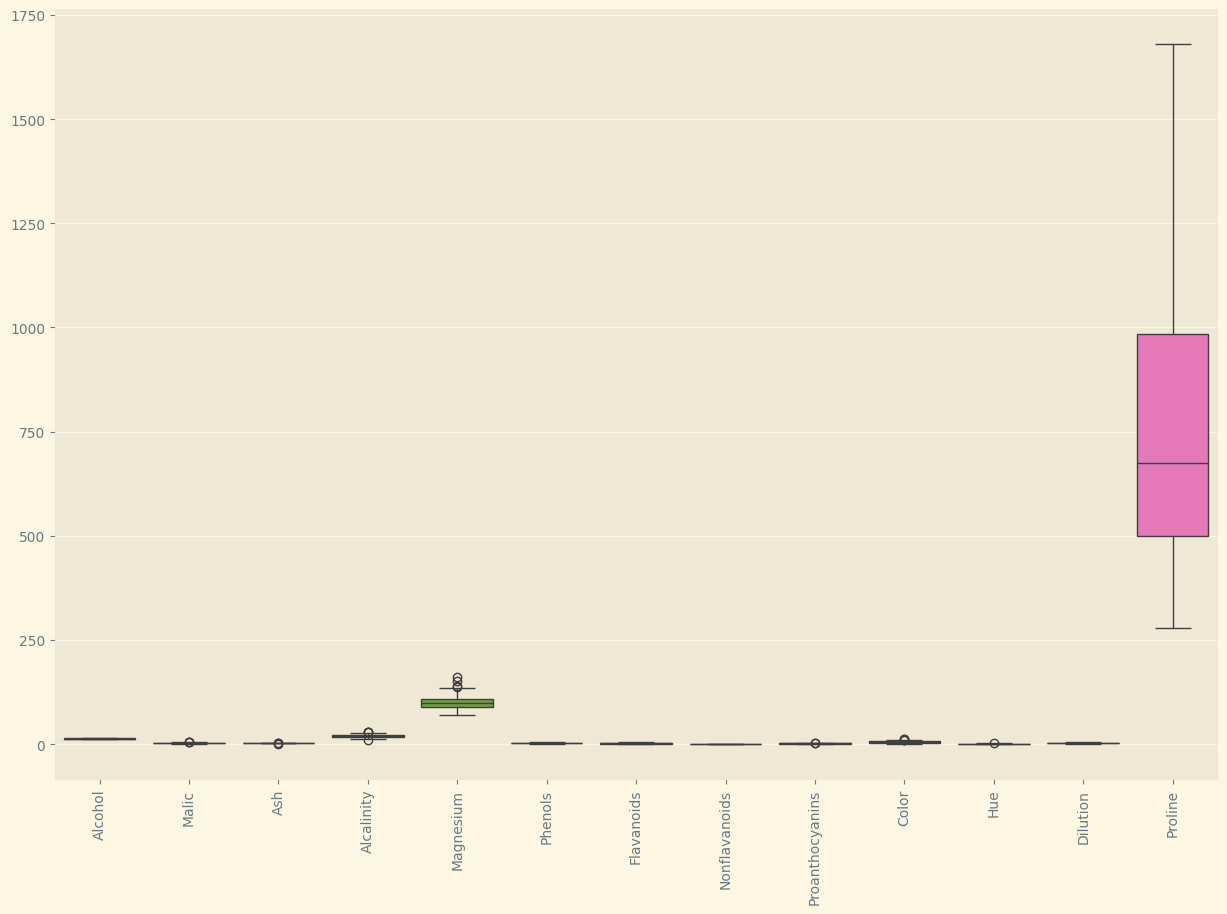

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=wine)
plt.xticks(rotation=90)
plt.show()

**density plot**

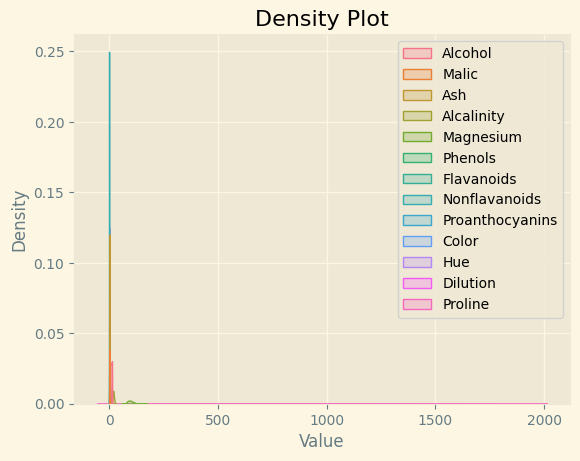

In [ ]:
# Create a density plot
sns.kdeplot(wine, shade=True, color='blue')
plt.title('Density Plot')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()


**Pair plot on dataset**

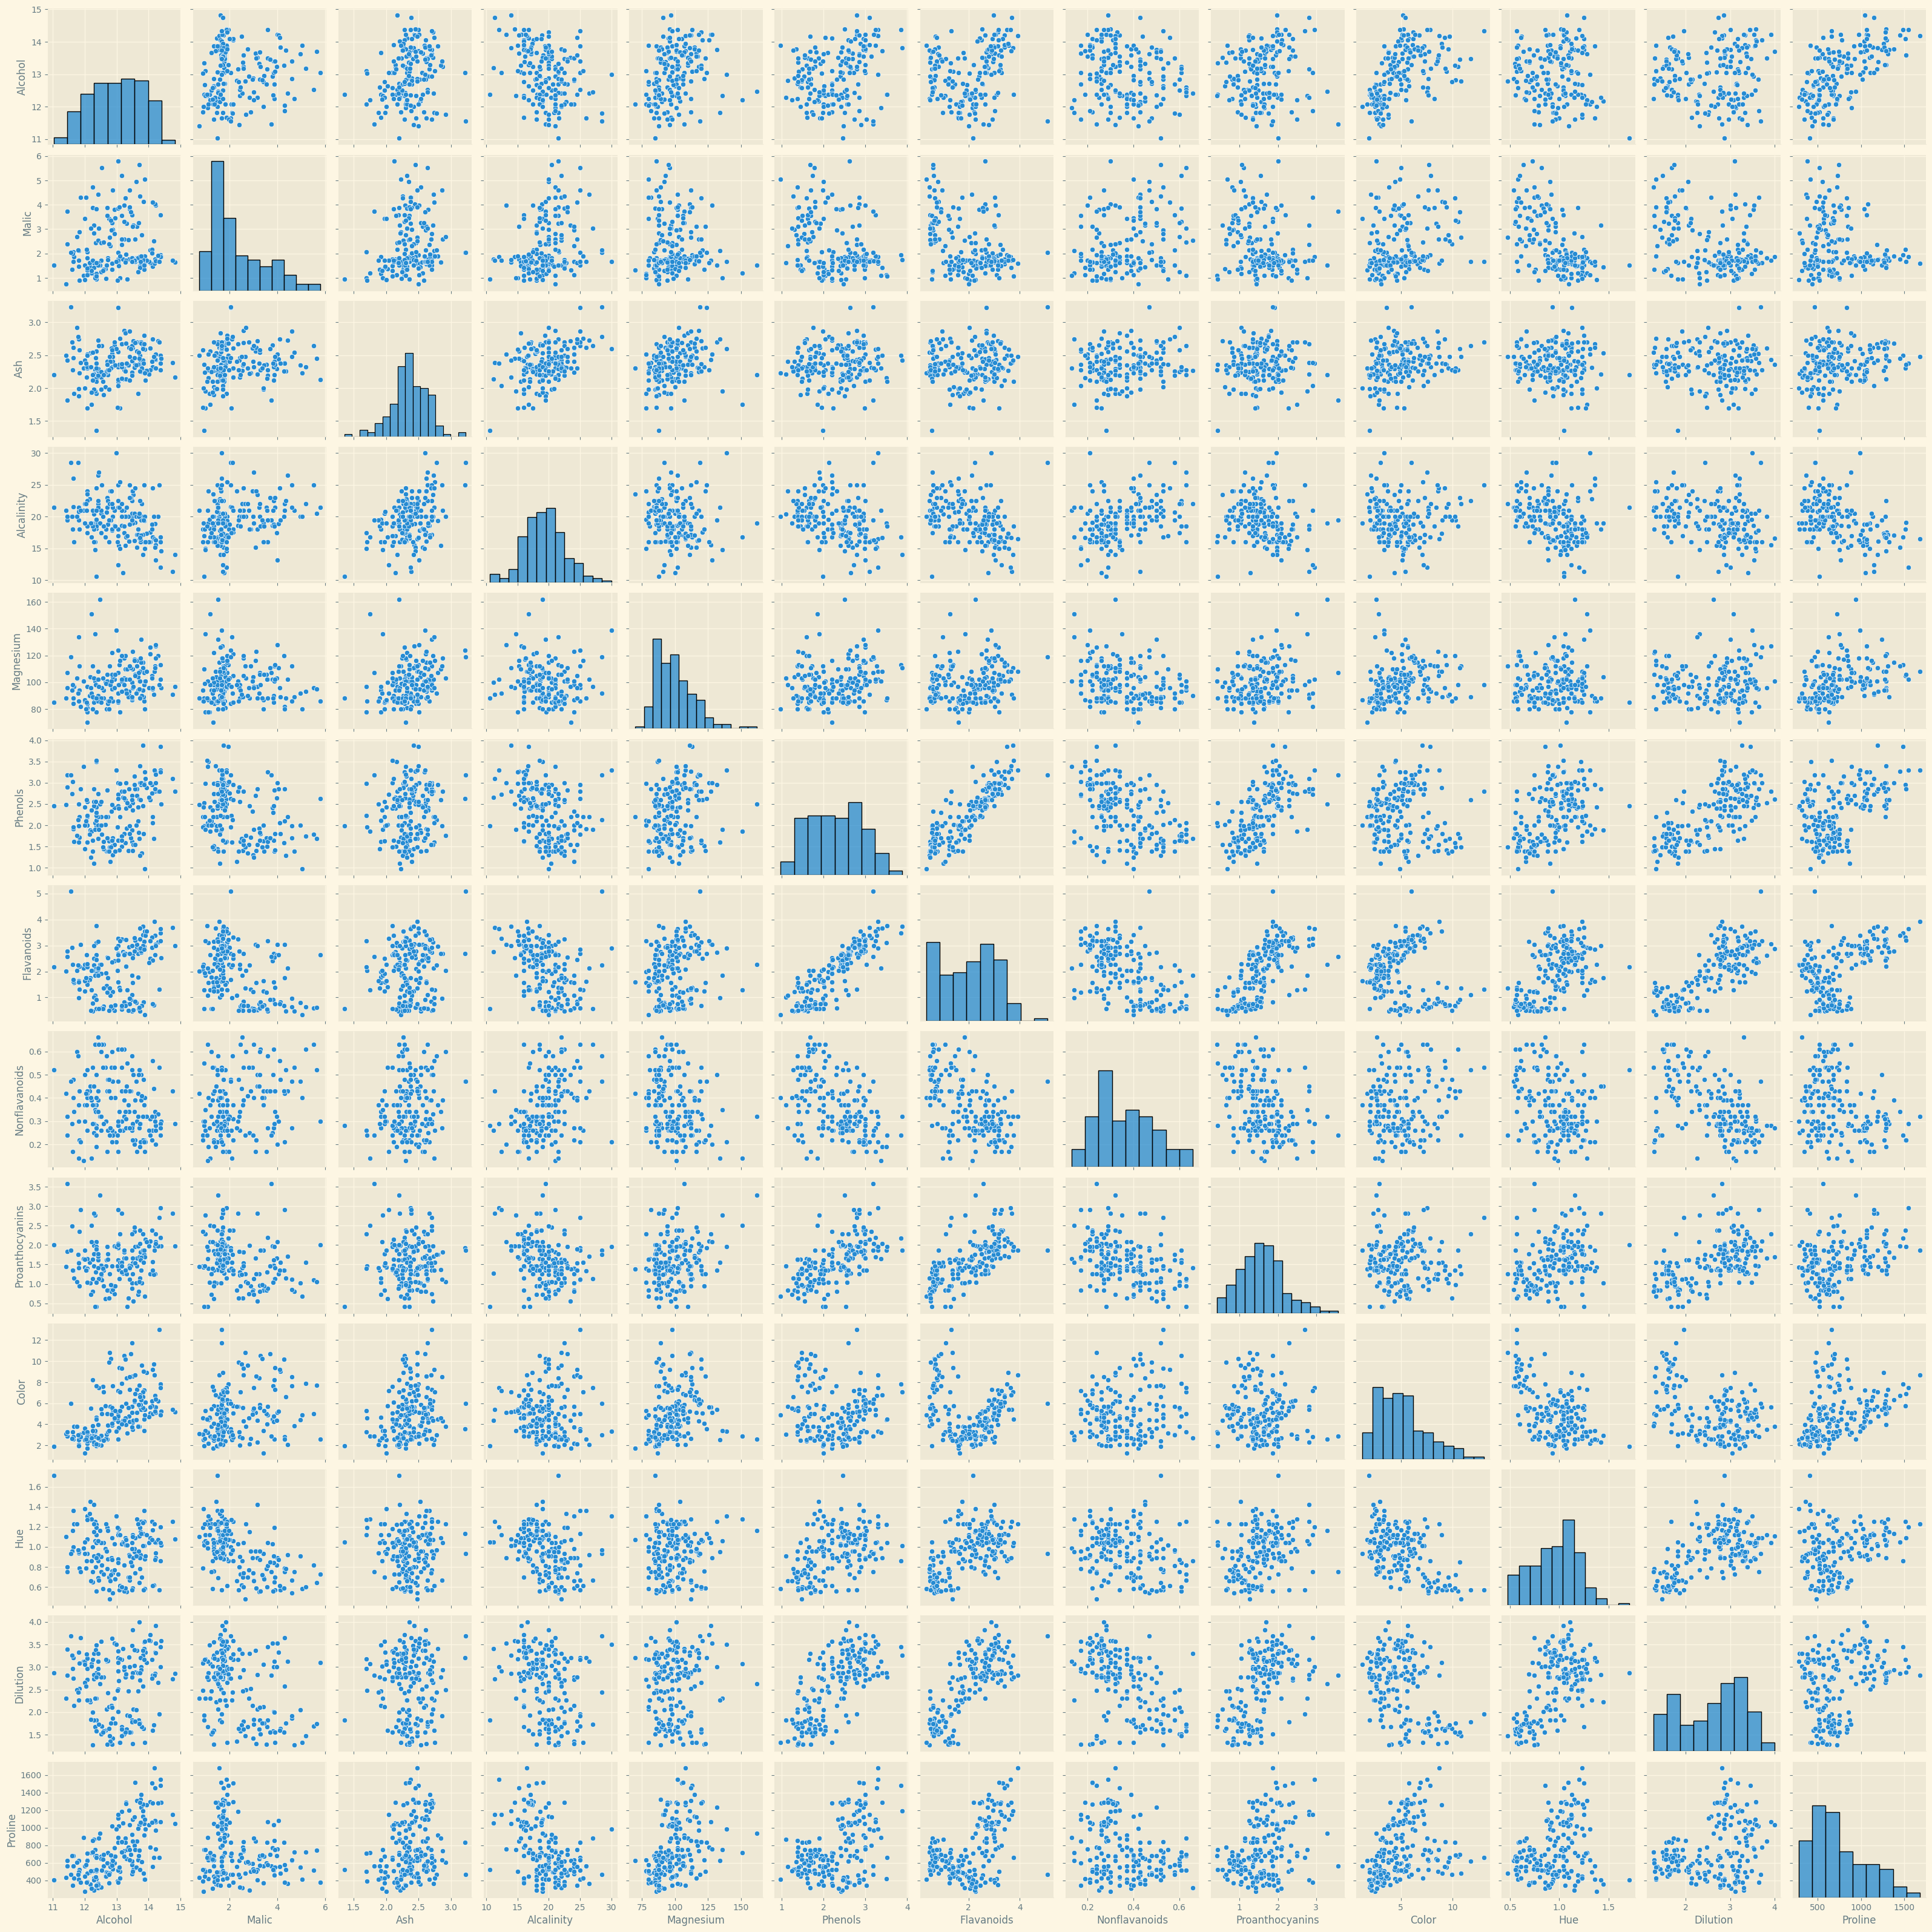

In [ ]:
sns.pairplot(wine,palette="dark")
plt.show()

In [ ]:
# Correlation matrix
correlation_matrix = wine.corr()
correlation_matrix

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


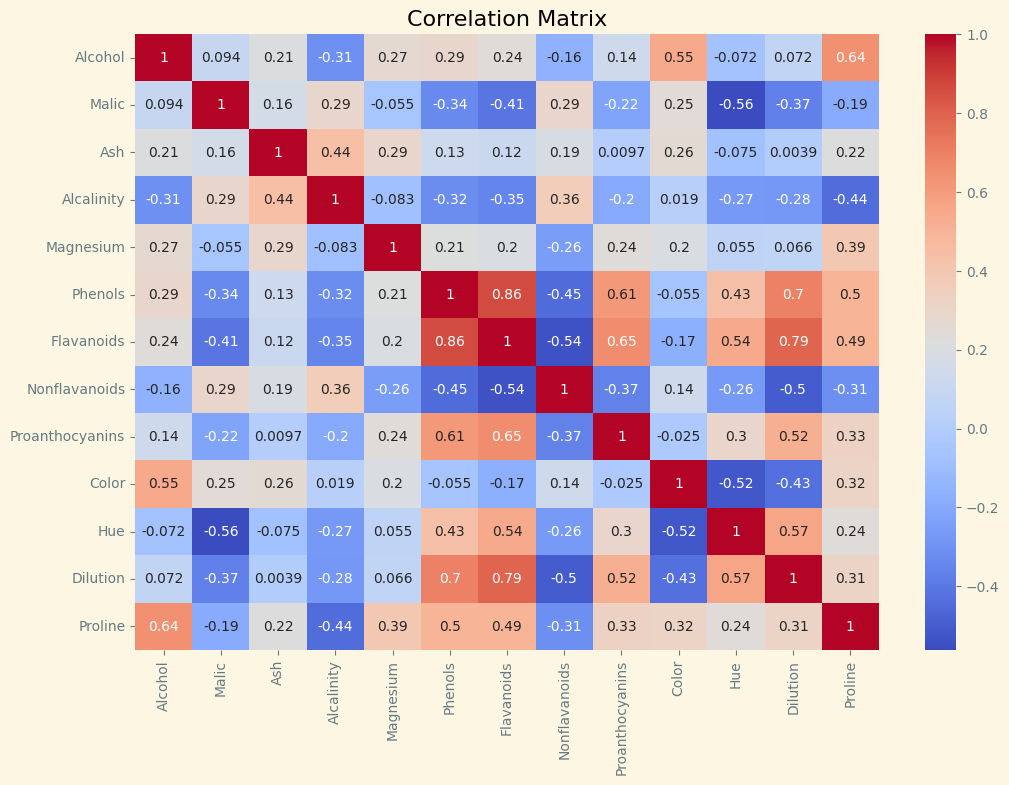

In [ ]:
# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## **Task 2: Dimensionality Reduction with PCA:**

### Data Preprocessing

**Applying Standard Scaler on the Data**

In [ ]:
# Step 1: Standardize the data
std = StandardScaler()
X_scaled  = std.fit_transform(wine)
X_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [ ]:
X_scaled.shape

(178, 13)

**Applying MinMax Scaler on Dataset**

In [ ]:
# Using Minmaxscaler for accuracy result comparison

from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(wine)
minmax_df.shape

(178, 13)

### **PCA**
Principal Component Analysis (PCA) was the first dimensionality reduction technique discovered (by Karl Pearson - yes, the guy from Pearson's correlation coefficient) and dates back to as early as 1901. It is very popular because it is fast, easy to implement and easy to interpret.

PCA works by finding a low dimensional subspace that maximises the variance of the data in that subspace and performing a linear projection. This basically means the data will be as spread out as possible, without changing the relationship between the data points. This allows us to find patterns or indentify clusters if any exist.


In [ ]:
# Step 2: Perform PCA without specifying number of components to compute them all
pca = PCA()
pca.fit(X_scaled)


PCA()

In [ ]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [ ]:
len(pca.explained_variance_ratio_)

13

Text(0.5, 1.0, 'Explained variance by each component')

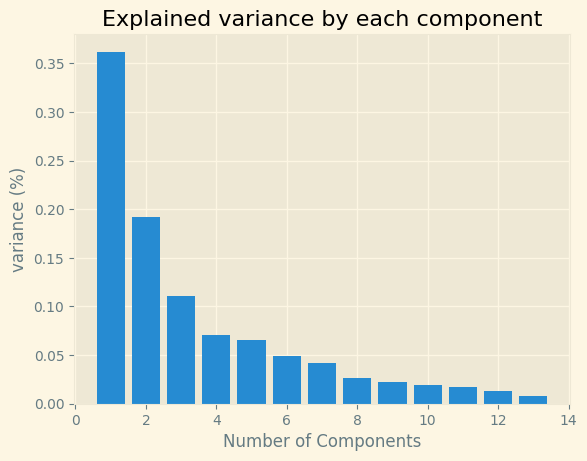

In [ ]:
plt.bar(range(1, len(explained_variance)+1),explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('variance (%)')
plt.title('Explained variance by each component')

In [ ]:
# PCA
pca = PCA(n_components=3)
pca_std = pca.fit_transform(X_scaled)

# Convert to data frame
pca_std_df = pd.DataFrame(data = pca_std, columns = ['PC1', 'PC2','PC3'])

# Shape and preview
print(pca_std_df.shape)
pca_std_df.head()

(178, 3)


,PC1,PC2,PC3
0,3.316751,1.443463,-0.165739
1,2.209465,-0.333393,-2.026457
2,2.516740,1.031151,0.982819
3,3.757066,2.756372,-0.176192
4,1.008908,0.869831,2.026688


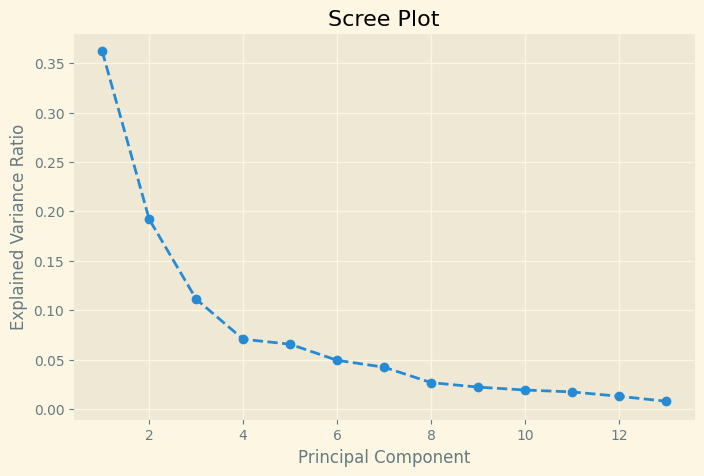

In [ ]:
# Step 3: Scree Plot (explained variance for each component)
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

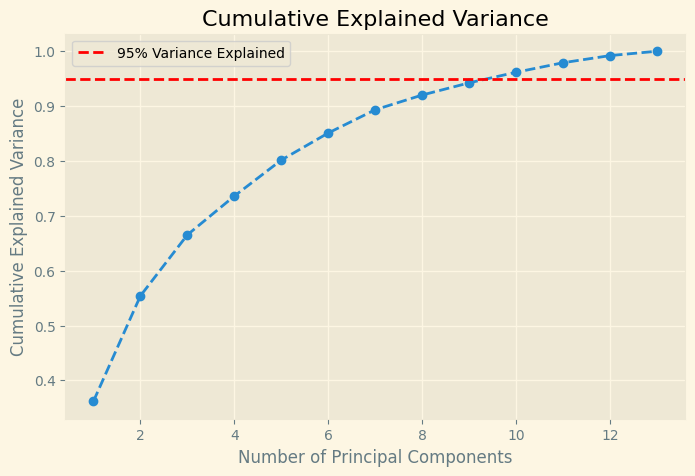

In [ ]:
# Step 4: Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label="95% Variance Explained")
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [ ]:
# Cumulative Variance
var1 = np.cumsum(np.round(explained_variance,decimals = 4)*100)
var1

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

In [ ]:
# Now we will transform the original dataset into the principal components using the optimal number of components.

# Step 1: Set the number of components to 6 based on the previous analysis (as 6 components explain ~95% variance)
pca_optimal = PCA(n_components=3)

# Step 2: Fit and transform the scaled data
X_pca = pca_optimal.fit_transform(X_scaled)

# Create a DataFrame for the transformed data (principal components)
pca_columns = [f'PC{i+1}' for i in range(3)]
X_pca_df = pd.DataFrame(X_pca, columns=pca_columns)

# Display the first few rows of the transformed dataset
X_pca_df.head()


,PC1,PC2,PC3
0,3.316751,1.443463,-0.165739
1,2.209465,-0.333393,-2.026457
2,2.516740,1.031151,0.982819
3,3.757066,2.756372,-0.176192
4,1.008908,0.869831,2.026688


## **Task 3: Clustering with Original Data:**

Let's break down and explain the code you've provided:

### Code Overview
```python
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming df is the DataFrame created earlier
model1 = KMeans(n_clusters=5).fit(df)
df.plot(x="X", y="Y", c=model1.labels_, kind="scatter", s=50, cmap=plt.cm.coolwarm_r)
```

### Step-by-Step Explanation

1. **KMeans Clustering:**
   ```python
   model1 = KMeans(n_clusters=5).fit(df)
   ```
   - **`KMeans(n_clusters=5)`:** This initializes a KMeans clustering model from the `sklearn.cluster` module, specifying that you want to create 5 clusters (`n_clusters=5`).
   - **`.fit(df)`:** This fits the KMeans model to the DataFrame `df`. The algorithm tries to partition the data points into 5 clusters based on their proximity in the `X` and `Y` dimensions.
   - **`model1.labels_`:** After fitting, `model1.labels_` contains the cluster labels for each data point, indicating which of the 5 clusters each point belongs to.

2. **Plotting the Clusters:**
   ```python
   df.plot(x="X", y="Y", c=model1.labels_, kind="scatter", s=50, cmap=plt.cm.coolwarm_r)
   ```
   - **`df.plot(...)`:** This is using pandas' built-in plotting functionality to create a scatter plot.
   - **`x="X", y="Y"`:** Specifies that the `X` and `Y` columns of the DataFrame should be used for the x and y coordinates of the plot, respectively.
   - **`c=model1.labels_`:** This sets the color of each point in the scatter plot based on the cluster label assigned by the KMeans model. Points that belong to the same cluster will have the same color.
   - **`kind="scatter"`:** This specifies that the plot should be a scatter plot.
   - **`s=50`:** Sets the size of the points in the scatter plot to 50. You can adjust this value to make the points larger or smaller.
   - **`cmap=plt.cm.coolwarm_r`:** This sets the colormap used to differentiate the clusters. `plt.cm.coolwarm_r` is a reversed "coolwarm" colormap, which goes from cool colors (like blue) to warm colors (like red). Each cluster will have a different color.

### Summary
This code fits a KMeans clustering model to the DataFrame `df` with 5 clusters and then visualizes the clusters in a scatter plot. Each point represents a data entry from `df`, positioned based on its `X` and `Y` values. The color of each point indicates which of the 5 clusters it belongs to, providing a visual way to understand the clustering of the data.

In [ ]:
X_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

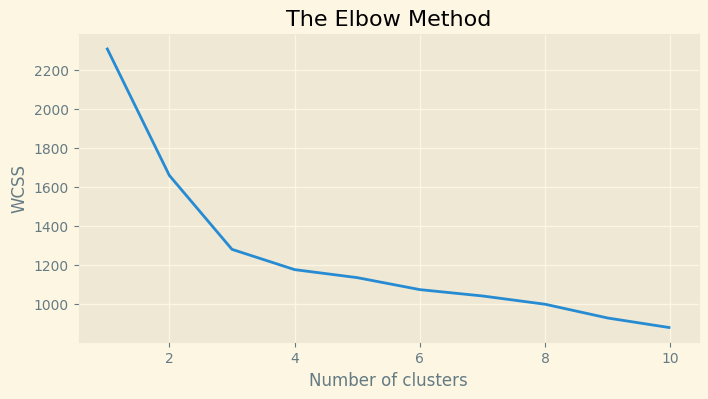

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
fig=plt.figure(figsize=(8,4))
WCSS=[]
for i in range(1,11):
  model=KMeans(n_clusters=i).fit(X_scaled)
  WCSS.append(model.inertia_)
  # .label -> cluster label ex:0,1,2,3,4,5,6  .inertia -> gives WCSS value
plt.plot(range(1,11),WCSS) #x axis -> K-values/number of clusters , y axis -> WCSS value
plt.title("The Elbow Method")
plt.xlabel("Number of clusters") # kvales
plt.ylabel("WCSS") #WCSS values
plt.show()

In [ ]:
model=KMeans(n_clusters=3).fit(X_scaled)
WCSS.append(model.inertia_)
WCSS

[2313.9999999999986,
 1659.0079672511504,
 1279.7311231046365,
 1175.7051928197127,
 1134.5593027902,
 1073.1266975169854,
 1040.54196264581,
 998.116808318224,
 927.4706990014919,
 877.6541408646889,
 1279.9661527749458]

In [ ]:
clf=KMeans(n_clusters=3)
clf.fit(X_scaled)

KMeans(n_clusters=3)

In [ ]:
y_names=clf.predict(X_scaled)

In [ ]:
y_names

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [ ]:
clf.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [ ]:
clf.inertia_ ####WCSS distances for k=6

1278.7607763668154

In [ ]:
pca = PCA()
pca.fit_transform(X_scaled)

array([[ 3.31675081e+00,  1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00, -3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00,  1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00,  2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00,  2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00,  2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [ ]:
std_scale = pd.DataFrame(X_scaled , columns=wine.columns)
std_scale.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [ ]:
md = clf.labels_
std_scale['cluster'] = md
std_scale.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,1
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,1
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,1
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,1
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1


In [ ]:
std_scale_count = std_scale['cluster'].value_counts()
std_scale_count

,count
cluster,
0,66
1,61
2,51


In [ ]:
std_scale.iloc[:,:].groupby('cluster').mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
cluster,,,,,,,,,,,,,
0,-0.939003,-0.391966,-0.439201,0.208988,-0.463774,-0.053348,0.066904,-0.019822,0.064792,-0.882075,0.452982,0.289738,-0.756026
1,0.878097,-0.304576,0.318942,-0.664524,0.564888,0.876505,0.943639,-0.585590,0.581783,0.167188,0.483728,0.767053,1.158347
2,0.164907,0.871547,0.186898,0.524367,-0.075473,-0.979330,-1.215248,0.726064,-0.779706,0.941539,-1.164789,-1.292412,-0.407088


In [ ]:
#styles
plt.style.use('Solarize_Light2')
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


**3D Scatter Plot**

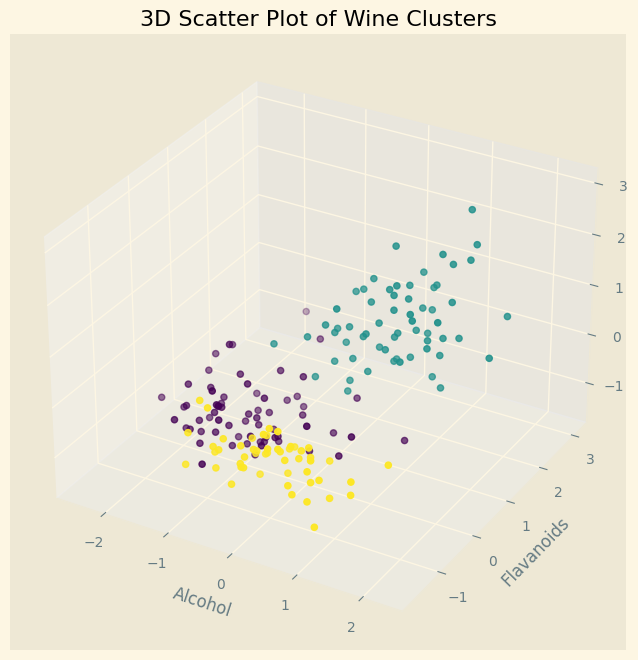

In [ ]:

feature1, feature2, feature3 = 'Alcohol', 'Flavanoids', 'Proline'

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(std_scale[feature1], std_scale[feature2], std_scale[feature3], c=clf.labels_)
ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
ax.set_zlabel(feature3)
plt.title('3D Scatter Plot of Wine Clusters')
plt.show()

Clustering completed and visualizations have been saved.


<Figure size 1200x1000 with 0 Axes>

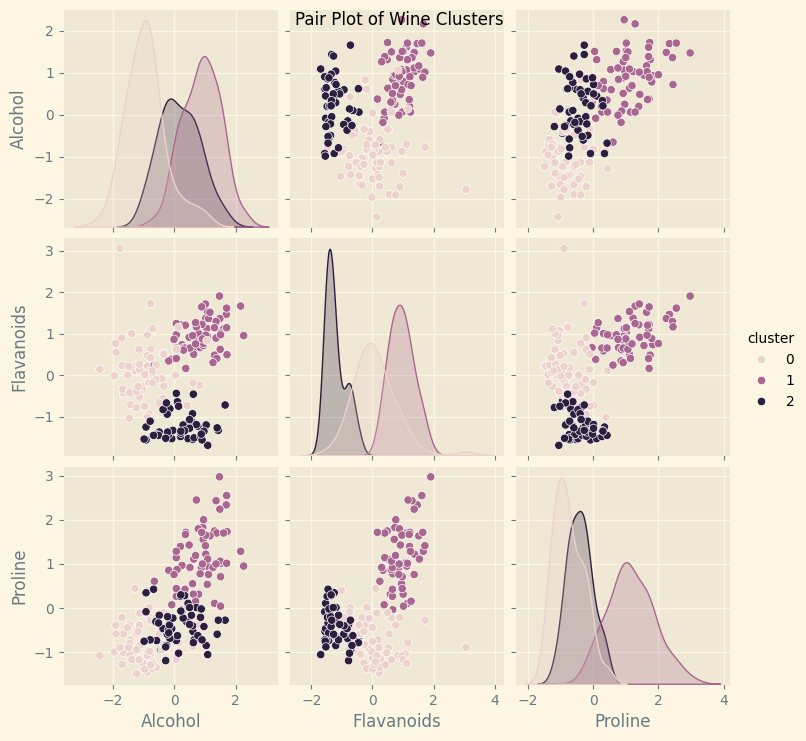

In [ ]:
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.pairplot(std_scale, hue='cluster', vars=[feature1, feature2, feature3])
plt.suptitle('Pair Plot of Wine Clusters')
plt.savefig('wine_clusters_pairplot.png')
print("Clustering completed and visualizations have been saved.")
plt.show()

###**silhouette_score**

**Silhouette Coefficient:**
Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

silhouette_score near to 1 -> best

silhouette_score near to 0 -> overfitting data

silhouette_score near to -1 -> worst

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(X_scaled,clf.labels_)
#silhouette_score near to 1 -> best
#silhouette_score near to 0 -> overfitting data
#silhouette_score near to -1 -> worst

0.28594199657074876

For 3 clusters:
Silhouette Score: 0.2849


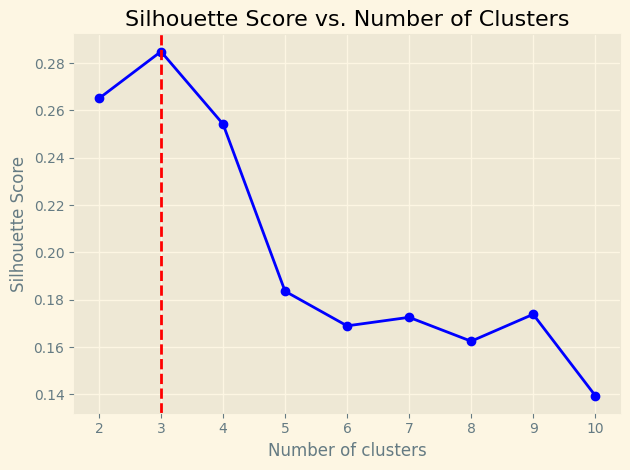

In [ ]:
# Calculate metrics for current clustering (3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)
silhouette = silhouette_score(X_scaled, labels)

print(f"For 3 clusters:")
print(f"Silhouette Score: {silhouette:.4f}")

# Calculate metrics for different numbers of clusters
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))


# Plot the results


plt.plot(k_range, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.axvline(3, ls="--", c="red")

plt.tight_layout()



### **Task 4: Clustering(K-means) with PCA Data:**

**Build KMeans Cluster algorithm using K=3 and PCA on Standard Scaler Applied Dataset**

**fit_predict**

**Purpose:** Used primarily with clustering algorithms.

**Functionality**: Fits the model to the data and then predicts the cluster labels for the data.

**Usage:**  Commonly used with clustering algorithms like KMeans, DBSCAN, etc.

---



*from sklearn.cluster import KMeans*

*kmeans = KMeans(n_clusters=3, random_state=42)*

*labels = kmeans.fit_predict(X_scaled)*


**fit_transform**

**Purpose:** Used with transformers for data preprocessing.

**Functionality:** Fits the transformer to the data and then transforms the data in a single step.

**Usage:** Commonly used with preprocessing steps like scaling, normalization, PCA, etc.
Example

*from sklearn.preprocessing import StandardScaler*

*scaler = StandardScaler()*

*X_scaled = scaler.fit_transform(X)*


In [ ]:
model_kmeans=KMeans(n_clusters=3)
y_predict_kmeans= model_kmeans.fit_predict(pca_std_df)
y_predict_kmeans.shape

(178,)

In [ ]:
y_predict_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [ ]:
model_kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [ ]:
model_kmeans.cluster_centers_

array([[-0.14201332, -1.76533485,  0.35691862],
       [ 2.26964076,  0.80065456, -0.15284922],
       [-2.72003575,  1.12565126, -0.23909324]])

In [ ]:
# within-cluster sum of squared

# The lower values of inertia are better and zero is optimal.
# Inertia is the sum of squared error for each cluster.
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)

model_kmeans.inertia_

514.2530230200017

In [ ]:
wine['Kmeans_label'] = model_kmeans.labels_

In [ ]:
# Group data by Clusters (K=6)
wine.groupby('Kmeans_label').agg(['mean'])

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmeans_label,,,,,,,,,,,,,
0,12.223387,1.953548,2.270323,20.443548,91.838710,2.242419,2.068871,0.366613,1.579839,2.954839,1.056548,2.815806,499.935484
1,13.637231,1.939692,2.418154,17.220000,108.123077,2.824923,2.941231,0.286615,1.950615,5.356462,1.071231,3.134923,1082.753846
2,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824


In [ ]:
var = pca.explained_variance_ratio_ # used to find the variance pc1,pc2, ... pc6
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [ ]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

In [ ]:
pca.components_ # .components -> finding w's

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [ 0.48365155,  0.22493093,  0.31606881, -0.0105905 ,  0.299634  ,
         0.06503951, -0.00335981,  0.02877949,  0.03930172,  0.52999567,
        -0.27923515, -0.16449619,  0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [ 0.21353865,  0.536813

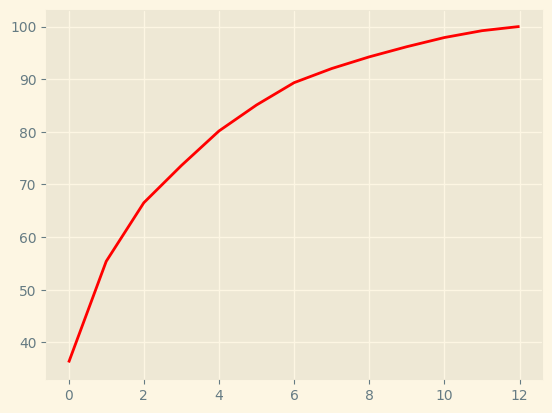

In [ ]:
# Variance plot for PCA components obtained
plt.plot(var1,color="red")

In [ ]:

X_pca[:,0:2]


array([[ 3.31675081,  1.44346263],
       [ 2.20946492, -0.33339289],
       [ 2.51674015,  1.0311513 ],
       [ 3.75706561,  2.75637191],
       [ 1.00890849,  0.86983082],
       [ 3.05025392,  2.12240111],
       [ 2.44908967,  1.17485013],
       [ 2.05943687,  1.60896307],
       [ 2.5108743 ,  0.91807096],
       [ 2.75362819,  0.78943767],
       [ 3.47973668,  1.30233324],
       [ 1.7547529 ,  0.61197723],
       [ 2.11346234,  0.67570634],
       [ 3.45815682,  1.13062988],
       [ 4.31278391,  2.09597558],
       [ 2.3051882 ,  1.66255173],
       [ 2.17195527,  2.32730534],
       [ 1.89897118,  1.63136888],
       [ 3.54198508,  2.51834367],
       [ 2.0845222 ,  1.06113799],
       [ 3.12440254,  0.78689711],
       [ 1.08657007,  0.24174355],
       [ 2.53522408, -0.09184062],
       [ 1.64498834, -0.51627893],
       [ 1.76157587, -0.31714893],
       [ 0.9900791 ,  0.94066734],
       [ 1.77527763,  0.68617513],
       [ 1.23542396, -0.08980704],
       [ 2.18840633,

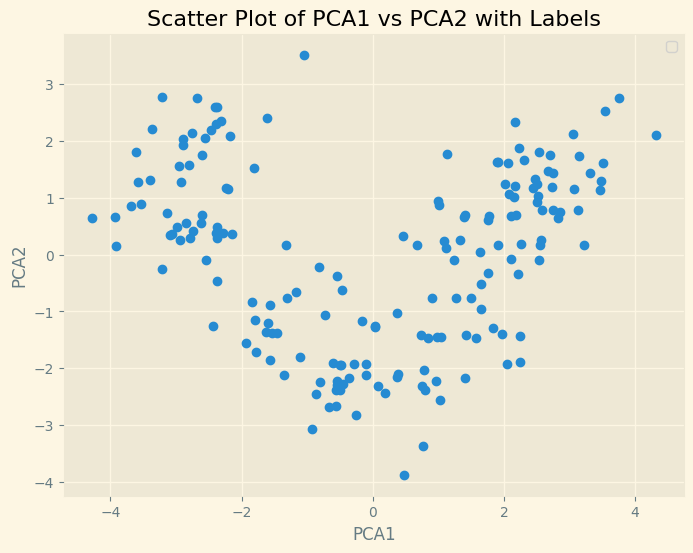

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Scatter Plot of PCA1 vs PCA2 with Labels')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
# plot between PCA1 and PCA2
x = X_pca[:,0:1]
y = X_pca[:,1:2]
#z = pca_values[:2:3]
plt.scatter(x,y)
plt.show()

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
 13  Kmeans_label     178 non-null    int32  
dtypes: float64(11), int32(1), int64(2)
memory usage: 18.9 KB


In [ ]:
finalDf = pd.concat([pd.DataFrame(X_pca[:,0:2],columns=['pc1','pc2']), wine[['Alcohol']]], axis = 1)
finalDf

,pc1,pc2,Alcohol
0,3.316751,1.443463,14.23
1,2.209465,-0.333393,13.20
2,2.516740,1.031151,13.16
3,3.757066,2.756372,14.37
4,1.008908,0.869831,13.24
...,...,...,...
173,-3.370524,2.216289,13.71
174,-2.601956,1.757229,13.40
175,-2.677839,2.760899,13.27
176,-2.387017,2.297347,13.17


<Axes: xlabel='pc1', ylabel='pc2'>

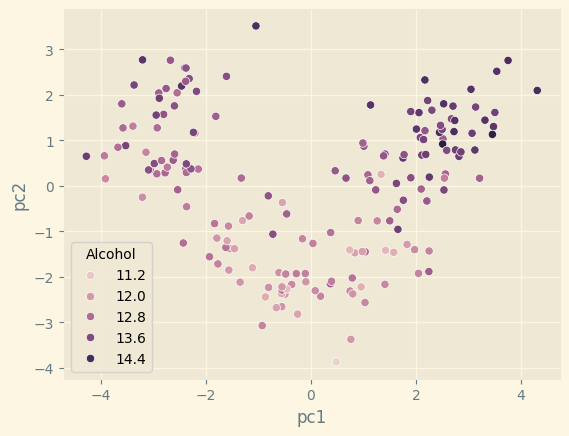

In [ ]:
import seaborn as sns
sns.scatterplot(data=finalDf,x='pc1',y='pc2',hue='Alcohol') # hue -> helps us in showing in diff color

### **Task 5: Comparison and Analysis:**

***Comparing Kmeans Clusters with the Original Classified Dataset using "Type" ***

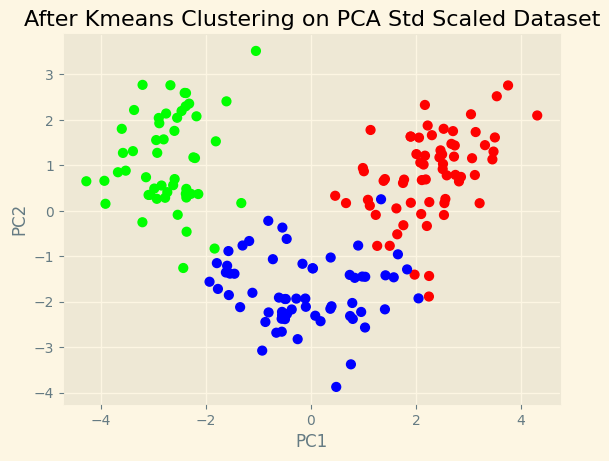

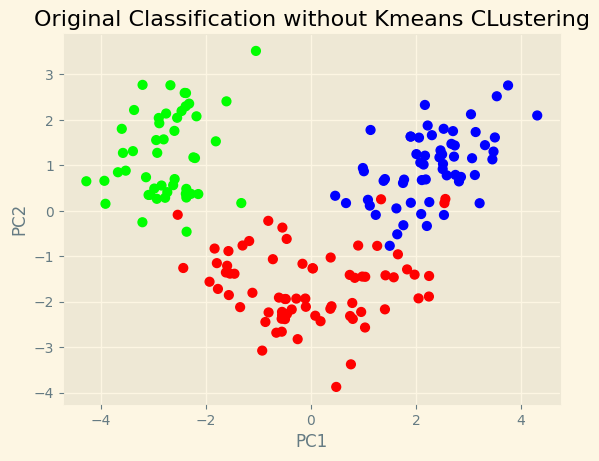

In [ ]:
# Scatterplot
plt.scatter(pca_std_df.iloc[:,0], pca_std_df.iloc[:,1], c=wine['Kmeans_label'], cmap="brg", s=40)

# Aesthetics
plt.title('After Kmeans Clustering on PCA Std Scaled Dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Scatterplot
plt.scatter(pca_std_df.iloc[:,0], pca_std_df.iloc[:,1], c=data['Type'], cmap="brg", s=40)

# Aesthetics
plt.title('Original Classification without Kmeans CLustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [ ]:
# Group data by Clusters (K=3)
display('After Applying PCA and Kmens CLustering on Dataset',wine.groupby('Kmeans_label').agg(['mean']),'Original Classified Dataset',data.groupby('Type').agg(['mean']))

'After Applying PCA and Kmens CLustering on Dataset'

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmeans_label,,,,,,,,,,,,,
0,12.223387,1.953548,2.270323,20.443548,91.838710,2.242419,2.068871,0.366613,1.579839,2.954839,1.056548,2.815806,499.935484
1,13.637231,1.939692,2.418154,17.220000,108.123077,2.824923,2.941231,0.286615,1.950615,5.356462,1.071231,3.134923,1082.753846
2,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824


'Original Classified Dataset'

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Type,,,,,,,,,,,,,
1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


### **Observation:**

The Type 2 has been perfectly clustered and rest has negliglable amount of difference

We have perfectly clustered the data into Three Types as compared to classification of three types of Wine was indicated in the Original Dataset in 'Type' Column

### **Task 6: Conclusion and Insights**


**1. Summarize the key findings and insights from the assignment:**
PCA helps in reducing dimensionality and noise, potentially improving clustering performance.
Clustering on PCA-transformed data can yield more distinct and meaningful clusters compared to clustering on the original high-dimensional data.


**2 Discuss the practical implications of using PCA and clustering in data analysis:**
PCA: Useful for preprocessing high-dimensional data, making clustering more effective and interpretable.
Clustering: Helps in identifying patterns and groupings in data, which is crucial for various applications like customer segmentation, anomaly detection, etc.


**3. Provide recommendations for when to use each technique based on the analysis conducted:**
Use PCA: When dealing with high-dimensional data with potential noise and irrelevant features. PCA can help in simplifying the data and improving clustering results.
Direct Clustering: When the dataset is not very high-dimensional or when retaining all original features is crucial for the analysis.






**Conclusion:**

In this analysis, I conducted EDA to uncover relationships and collinearity among variables, applied standardization, and used PCA for dimensionality reduction. Clustering with KMeans revealed that model performance fluctuated with different PCA transformations, highlighting the importance of careful component selection. Overall, PCA improved clustering by focusing on significant features, but balancing dimensionality reduction with information retention is crucial for optimal results.